# Inversa generalizada de Moore-Penrose

Existen varias formas de calcular la inversa generalizada de Moore-Penrose de una matriz. Aquí expondremos algunas de ellas usando diversas librerías de `R`.

## Cálculo a partir de una descomposición en valores singulares

Si $A$ es una matriz con entradas reales y $UDV^t$ es una descomposición en valores singulares corta de $A$, entonces por la demostración del Teorema VI.2.2 de [I. Ojeda, J. Gago, [Métodos matemáticos para la Estadística](https://publicauex.unex.es/libro/metodos-matematicos-para-estadistica_135467/)] la inversa generalizada de Moore-Penrose de $A$ es $A^\dagger=VD^{-1}U^t$.

Ilustremos este cálculo usando los Ejemplos VI.1.8 y VI.2.3 de [I. Ojeda, J. Gago, [Métodos matemáticos para la Estadística](https://publicauex.unex.es/libro/metodos-matematicos-para-estadistica_135467/)].


#### Usando `svd`

In [1]:
A<-rbind(c(2,0,1),c(3,-1,1),c(-2,4,1),c(1,1,1))
A

2,0,1
3,-1,1
-2,4,1
1,1,1


Como hemos visto, para calcular la descomposición en valores singulares, podemos utilizar `svd`.

In [2]:
dA<-svd(A)
dA

-2.672612e-01,-0.5,-0.77197017
-5.345225e-01,-0.5,0.27710193
8.017837e-01,-0.5,-0.07258877
2.498002e-16,-0.5,0.56745700
-7.071068e-01,-0.5773503,0.4082483
7.071068e-01,-0.5773503,0.4082483
1.665335e-16,-0.5773503,-0.8164966


In [3]:
zapsmall(dA$d)

[1] 5.291503 3.464102 0.000000

Como el último valor es nulo, sólo tomamos las partes de `$u` y `$v` que nos interesan.

In [4]:
U<-dA$u[,1:2]
V<-dA$v[,1:2]
d<-dA$d[1:2]
zapsmall(U%*%diag(d)%*%t(V))

2,0,1
3,-1,1
-2,4,1
1,1,1


In [5]:
igA<-V%*%diag(1/d)%*%t(U)
igA

0.11904762,0.15476190,-0.02380952,0.08333333
0.04761905,0.01190476,0.19047619,0.08333333
0.08333333,0.08333333,0.08333333,0.08333333


Veamos que verifica las condiciones de inversa generalizada.

$AA^\dagger A=A$:

In [6]:
zapsmall(A%*%igA%*%A)

2,0,1
3,-1,1
-2,4,1
1,1,1


$A^\dagger A A^\dagger=A^\dagger$:

In [7]:
zapsmall(igA%*%A%*%igA)

0.11904762,0.15476190,-0.02380952,0.08333333
0.04761905,0.01190476,0.19047619,0.08333333
0.08333333,0.08333333,0.08333333,0.08333333


$A A^\dagger$ y $A^\dagger A$ son simétricas:

Si hacemos la comprobación directa, obtenemos que no son iguales por problemas de redondeo.

In [8]:
A%*%igA == t(A%*%igA)

TRUE,FALSE,FALSE,TRUE
FALSE,TRUE,FALSE,TRUE
FALSE,FALSE,TRUE,FALSE
TRUE,TRUE,FALSE,TRUE


In [9]:
A%*%igA

0.32142857,0.3928571,0.03571429,0.25
0.39285714,0.5357143,-0.17857143,0.25
0.03571429,-0.1785714,0.89285714,0.25
0.25000000,0.2500000,0.25000000,0.25


In [10]:
t(A%*%igA)

0.32142857,0.3928571,0.03571429,0.25
0.39285714,0.5357143,-0.17857143,0.25
0.03571429,-0.1785714,0.89285714,0.25
0.25000000,0.2500000,0.25000000,0.25


Si usamos `zapsmall` para comparar, el problema desaparece.

In [11]:
all(zapsmall(A%*%igA)==zapsmall(t(A%*%igA)))

[1] TRUE

In [12]:
all(zapsmall(igA%*%A)==zapsmall(t(igA%*%A)))

[1] TRUE

## Cálculo a partir de una factorización de rango pleno

Podemos calcular la inversa generalizada una vez que conozcamos una [factorización de rango pleno](https://es.wikipedia.org/wiki/Factorizaci%C3%B3n_de_rango) de la matriz. Ilustramos este proceso siguiendo los pasos que se explican en [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

In [13]:
library("pracma")
frA<-rref(cbind(A,diag(4)))
frA
        

1,0,0.5,0,0,-0.1666667,0.6666667
0,1,0.5,0,0,0.1666667,0.3333333
0,0,0.0,1,0,0.3333333,-1.3333333
0,0,0.0,0,1,0.6666667,-1.6666667


In [14]:
Q<-frA[,4:7]
H<-frA[,1:3]
H

1,0,0.5
0,1,0.5
0,0,0.0
0,0,0.0


Como $QA=H$, haciendo $Q^{-1}H$ recuperamos $A$. Como las dos últimas filas de $H$ son cero, sólo nos interesan las dos primeras filas $H$ y las dos primeras columnas de $Q^{-1}$.

In [15]:
solve(Q)%*%H

2,0,1
3,-1,1
-2,4,1
1,1,1


In [16]:
E<-solve(Q)[,1:2]
F<-H[1:2,]
E%*%F

2,0,1
3,-1,1
-2,4,1
1,1,1


El rango de `E` y de `F` coincide con el rango de `A`.

El siguiente paso es calcular una inversa por la derecha de `F` y una inversa por la izquierda de `E`. Al ser ambas de rango pleno for fillas y por columnas, respectivamente, esto se puede hacer de la siguiente forma.

In [17]:
FR<-t(F)%*%solve(F%*%t(F))
FR

0.8333333,-0.1666667
-0.1666667,0.8333333
0.3333333,0.3333333


In [18]:
F%*%FR

1,0
0,1


In [19]:
EL<-solve(t(E)%*%E)%*%t(E)
EL

0.16071429,0.19642857,0.01785714,0.125
0.08928571,0.05357143,0.23214286,0.125


In [20]:
zapsmall(EL%*%E)

1,0
0,1


In [21]:
igrpA<-FR%*%EL
igrpA

0.11904762,0.15476190,-0.02380952,0.08333333
0.04761905,0.01190476,0.19047619,0.08333333
0.08333333,0.08333333,0.08333333,0.08333333


In [22]:
all(zapsmall(igA)==zapsmall(igrpA))

[1] TRUE

## Cálculo usando `pracma::pinv`

In [23]:
library("pracma")

La función `pinv` de la librería `pracma` nos devuelve la inversa generalizada de Moore-Penrose directamente.

In [24]:
pinv(A)

0.11904762,0.15476190,-0.02380952,0.08333333
0.04761905,0.01190476,0.19047619,0.08333333
0.08333333,0.08333333,0.08333333,0.08333333


## Cálculo usando `caracas::pinv`

In [25]:
library("caracas")


Attaching package: ‘caracas’


The following objects are masked from ‘package:pracma’:

    inv, nullspace, pinv, rref, taylor


The following objects are masked from ‘package:base’:

    %*%, det, diag, diag<-




Al igual que `pracma`, `caracas` ofrece una versión "simbólica" de `pinv`.

In [26]:
piA<-pinv(as_sym(A))
piA

[caracas]: ⎡       13              ⎤
           ⎢5/42   ──   -1/42  1/12⎥
           ⎢       84              ⎥
           ⎢                       ⎥
           ⎢1/21  1/84  4/21   1/12⎥
           ⎢                       ⎥
           ⎣1/12  1/12  1/12   1/12⎦

In [27]:
N(.Last.value,5)

[caracas]: ⎡0.11905   0.15476   -0.02381  0.083333⎤
           ⎢                                      ⎥
           ⎢0.047619  0.011905  0.19048   0.083333⎥
           ⎢                                      ⎥
           ⎣0.083333  0.083333  0.083333  0.083333⎦

En este caso no tenemos los problemas de redondeo que vimos anteriormente.

In [28]:
as_sym(A)%*%piA-t(as_sym(A)%*%piA)

[caracas]: ⎡0  0  0  0⎤
           ⎢          ⎥
           ⎢0  0  0  0⎥
           ⎢          ⎥
           ⎢0  0  0  0⎥
           ⎢          ⎥
           ⎣0  0  0  0⎦

## Soluciónes mínimo cuadráticas

Una de las aplicaciones de la inversa generalizada de Moore-Penrose es el cálculo de soluciones óptimas (o de norma mínima) minimo-cuadráticas de un sistema de ecuaciones. Si $Ax=b$ es un sistema de ecuaciones, entonces la solución óptima mínimo-cuadrática de ese sistema es $A^\dagger b$.

Ilustremos esta construcción con el Ejemplo 13 (Capítulo VII) de [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

### Ejemplo

Calcular una solución óptima mínimo-cuadrática del sistema $Ax=b$ con 
$$
A=\begin{pmatrix}
2 & 0 & 2 & 0 \\
1 & 1 & 2 & 1 \\
-1 & 3 & 2 & 3 
\end{pmatrix}
$$
y $b=(6,0,2)^t$.

In [29]:
A<-as_sym(rbind(c(2,0,2,0),c(1,1,2,1),c(-1,3,2,3)))
A

[caracas]: ⎡2   0  2  0⎤
           ⎢           ⎥
           ⎢1   1  2  1⎥
           ⎢           ⎥
           ⎣-1  3  2  3⎦

In [30]:
b<-as_sym(c(6,0,2))

In [31]:
igA<-pinv(A)
igA

[caracas]: ⎡ 1/5   1/10  -1/10⎤
           ⎢                  ⎥
           ⎢-3/70  1/70  9/70 ⎥
           ⎢                  ⎥
           ⎢ 11               ⎥
           ⎢ ──    4/35  1/35 ⎥
           ⎢ 70               ⎥
           ⎢                  ⎥
           ⎣-3/70  1/70  9/70 ⎦

In [32]:
x<-igA%*%b
x

[caracas]: [1  0  1  0]ᵀ

El sistema no es compatible, ya que $Ax\neq b$.

In [33]:
A%*%x

[caracas]: [4  3  1]ᵀ

El siguiente ejemplo se corresponde con los Ejemplos 14 y 15 (Capítulo VII) de [L. Merino, E. Santos, [Álgebra Lineal con Métodos Elementales](https://www.amazon.es/%C3%81lgebra-lineal-m%C3%A9todos-elementales-GONZALEZ/dp/8497324811)].

### Ejemplo

La siguiente tabla muestra la estatura media de los niños de cero a cuatro semestres de vida

| x | 0 | 1 | 2 | 3 | 4 |
| :---| :--- | :--- | :--- | :--- | :---| 
| y | 50 | 66.5 | 75 | 81 | 86.5 |

Intentemos ajustar una recta $y=ax+b$. Idealmente, por los datos que tenemos
$$
\begin{array}{rcl}
b & =& 50,\\
a + b & =& 66.5,\\
2a+b &=& 75,\\
3a+b &=& 81,\\
4a+b &=& 86.5.
\end{array}
$$
Que podemos escribir en forma de matriz como 
$$
\begin{pmatrix}
0 & 1\\
1 & 1\\
2 & 1\\
3 & 1\\
4 & 1
\end{pmatrix} 
\begin{pmatrix}
a \\ b
\end{pmatrix}
= 
\begin{pmatrix}
50 \\ 66.5 \\ 75 \\ 81 \\ 86.5
\end{pmatrix}.
$$

In [34]:
A<-cbind(0:4,rep(1,5))
A

0,1
1,1
2,1
3,1
4,1


In [35]:
alt<-c(50,66.5,75,81,86.5)

In [36]:
igA<-pinv(as_sym(A))

In [37]:
xo<-igA%*%as_sym(alt)
xo

[caracas]: [8.75  54.3]ᵀ

In [38]:
a<-as_expr(xo[1])
a

[1] 8.75

In [39]:
b<-as_expr(xo[2])
b

[1] 54.3

Así nuestra recta de aproximación es $y=8.75x+54.3$.

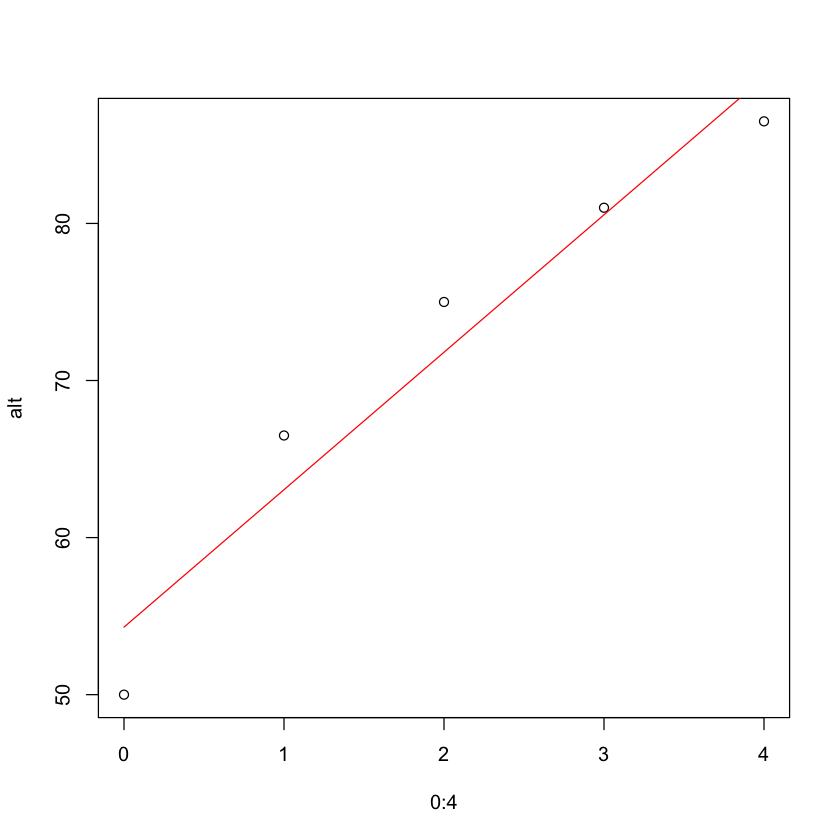

In [40]:
plot(0:4,alt)
lines(0:4,a*(0:4)+b,col="red")

Esta recta también la podríamos haber obtenido con `lsfit`.

In [41]:
lsfit(0:4,alt)

$coefficients
Intercept         X 
    54.30      8.75 

$residuals
[1] -4.30  3.45  3.20  0.45 -2.80

$intercept
[1] TRUE

$qr
$qt
[1] -160.54968   27.66993    5.36208    3.96040    2.05872

$qr
      Intercept          X
[1,] -2.2360680 -4.4721360
[2,]  0.4472136  3.1622777
[3,]  0.4472136 -0.1954395
[4,]  0.4472136 -0.5116673
[5,]  0.4472136 -0.8278950

$qraux
[1] 1.447214 1.120788

$rank
[1] 2

$pivot
[1] 1 2

$tol
[1] 1e-07

attr(,"class")
[1] "qr"


Y también con `lm`.

In [42]:
datos<-data.frame(
    "edad"<-0:4, 
    "altura"<-alt
)

In [43]:
rl<-lm(altura~edad,datos)
rl


Call:
lm(formula = altura ~ edad, data = datos)

Coefficients:
(Intercept)         edad  
      54.30         8.75  


In [44]:
summary(rl)


Call:
lm(formula = altura ~ edad, data = datos)

Residuals:
    1     2     3     4     5 
-4.30  3.45  3.20  0.45 -2.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   54.300      3.120  17.403 0.000413 ***
edad           8.750      1.274   6.869 0.006317 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.028 on 3 degrees of freedom
Multiple R-squared:  0.9402,	Adjusted R-squared:  0.9203 
F-statistic: 47.19 on 1 and 3 DF,  p-value: 0.006317


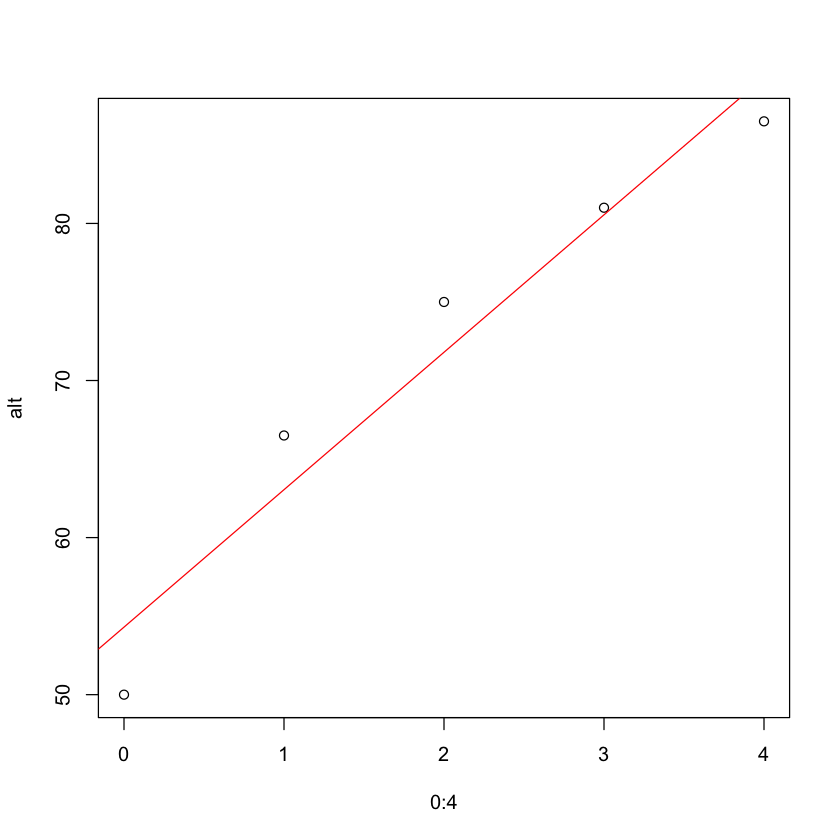

In [45]:
plot(0:4,alt)
abline(rl,col="red")

### Ejemplo

Supongamos que en nuestro problema de edades y alturas queremos ajustar $y$ por un polinomio de grado dos en $x$, $y=ax^2+bx+c$. Evaluando ese polinomio en los valores que conocemos en $x$ y en $y$, obtenemos 
$$
\begin{pmatrix}
0 & 0 & 1\\
1 & 1 & 1\\
4 & 2 & 1\\
9 & 3 & 1\\
16 & 4 & 1
\end{pmatrix} 
\begin{pmatrix}
a \\ b \\ c
\end{pmatrix}
= 
\begin{pmatrix}
50 \\ 66.5 \\ 75 \\ 81 \\ 86.5
\end{pmatrix}.
$$

In [46]:
A<-cbind((0:4)^2,0:4,rep(1,5))
A

0,0,1
1,1,1
4,2,1
9,3,1
16,4,1


In [47]:
igA<-pinv(as_sym(A))
o<-igA%*%as_sym(alt)
o

[caracas]: [-1.75  15.75  50.8]ᵀ

In [48]:
a<-as_expr(o[1])
b<-as_expr(o[2])
c<-as_expr(o[3])

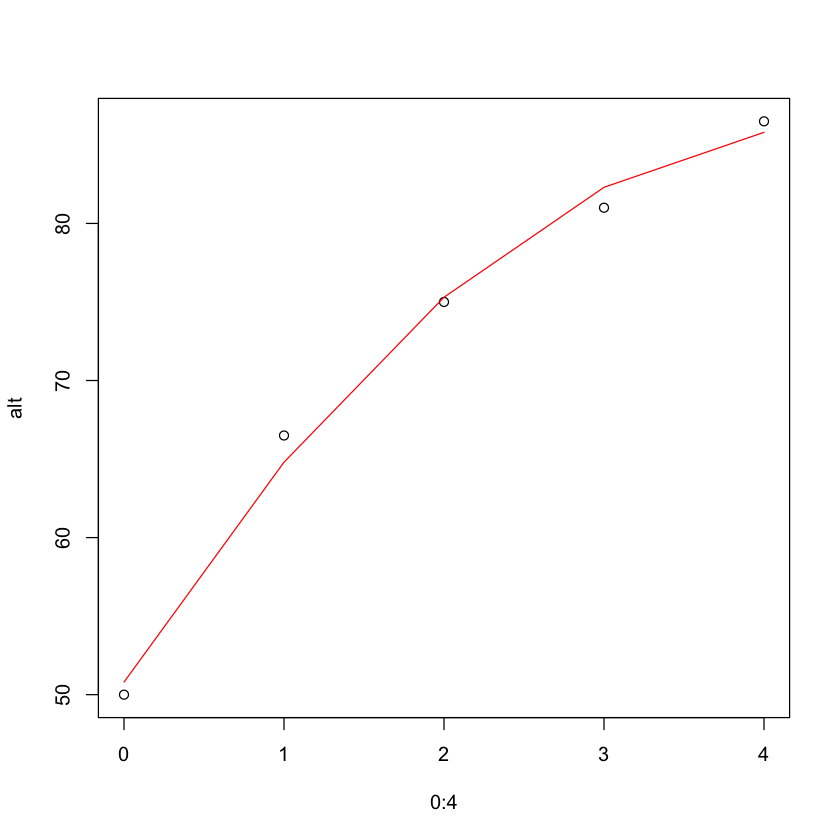

In [49]:
plot(0:4,alt)
lines(0:4,a*(0:4)^2+b*(0:4)+c,col="red")

En nuestros dos últimos ejemplos, $A$ es de rango pleno por columnas, por lo que la solución minimo-cuadrática podríamos haberla calculado con $A^L=(A^tA)^{-1}A^t$ (inversa a la izquierda de $A$).

In [50]:
AL<-inv(t(as_sym(A))%*%as_sym(A))%*%t(as_sym(A))
AL

[caracas]: ⎡1/7   -1/14  -1/7   -1/14  1/7 ⎤
           ⎢                               ⎥
           ⎢-27    13            27    -13 ⎥
           ⎢────   ──     4/7    ──    ────⎥
           ⎢ 35    70            70     35 ⎥
           ⎢                               ⎥
           ⎢ 31                            ⎥
           ⎢ ──   9/35   -3/35  -1/7   3/35⎥
           ⎣ 35                            ⎦

In [51]:
igA

[caracas]: ⎡1/7   -1/14  -1/7   -1/14  1/7 ⎤
           ⎢                               ⎥
           ⎢-27    13            27    -13 ⎥
           ⎢────   ──     4/7    ──    ────⎥
           ⎢ 35    70            70     35 ⎥
           ⎢                               ⎥
           ⎢ 31                            ⎥
           ⎢ ──   9/35   -3/35  -1/7   3/35⎥
           ⎣ 35                            ⎦